In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import nanonispy as nap
import cv2 as cv
from skimage import filters
from skimage.data import camera
from skimage.util import compare_images
from scipy import ndimage as ndi
from skimage import feature
import skimage
from scipy import ndimage

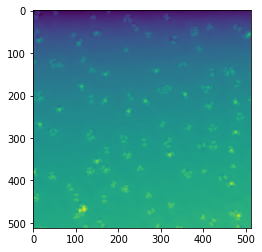

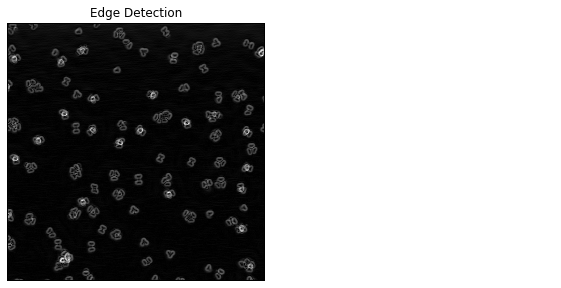

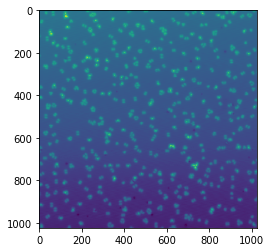

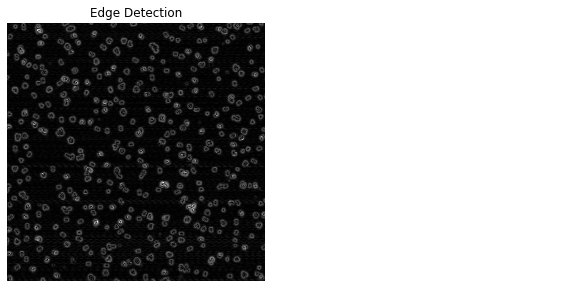

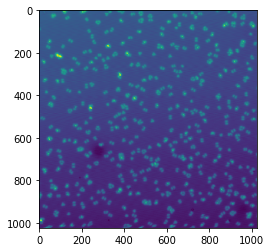

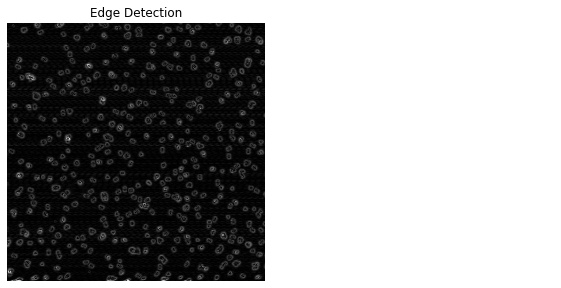

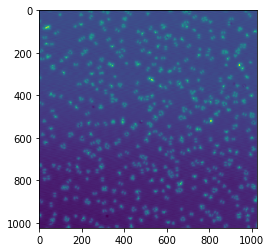

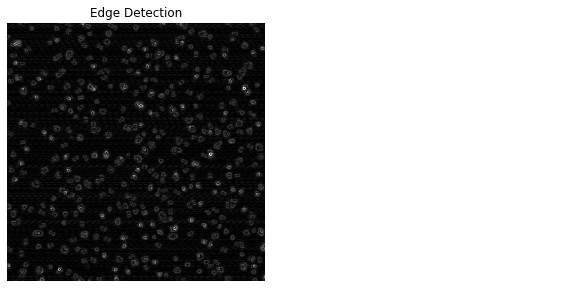

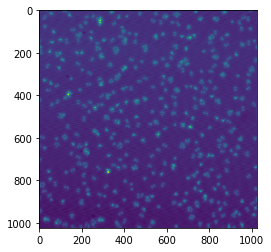

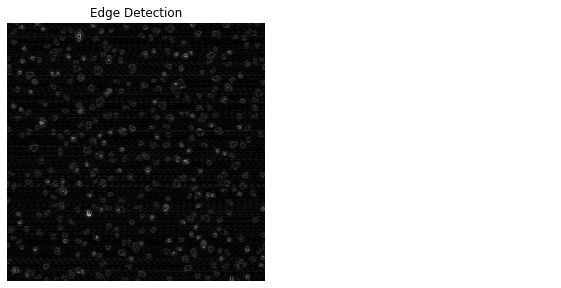

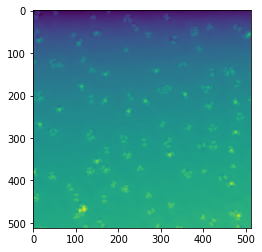

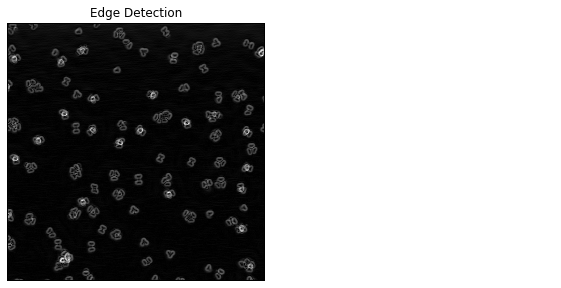

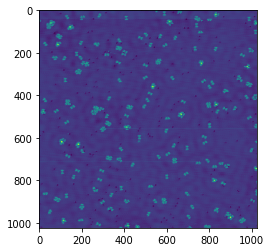

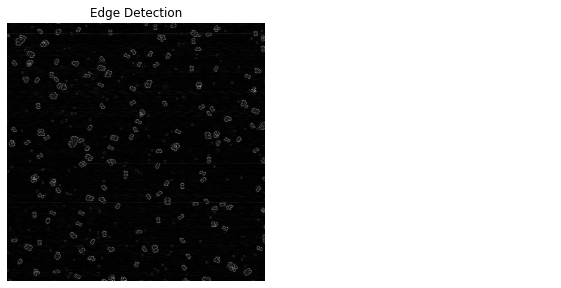

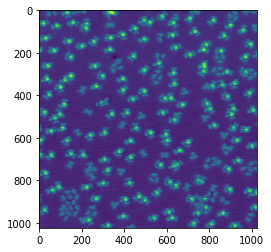

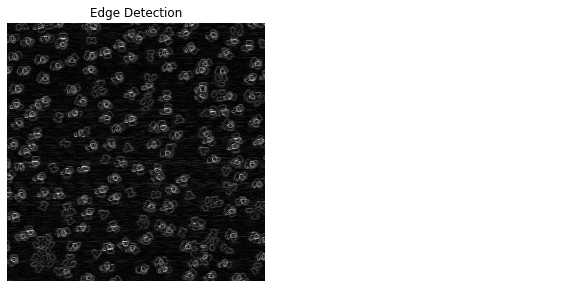

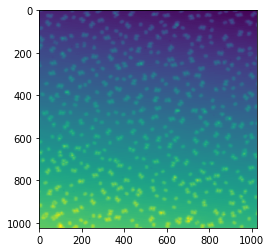

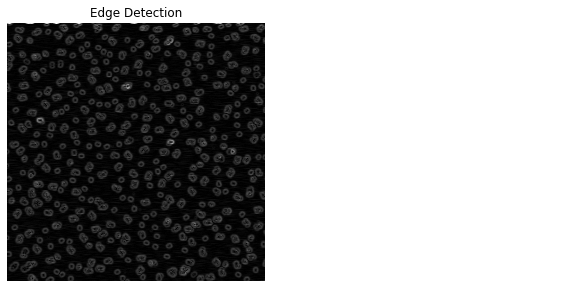

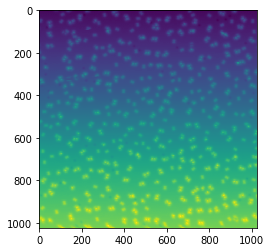

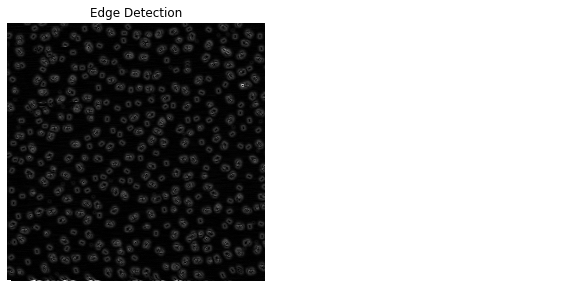

In [3]:
Hellerstedt_APT = ['Hellerstedt APT/111_test_data.p', "Hellerstedt APT/Ag111_APT_007.sxm", "Hellerstedt APT/Ag111_APT_008.sxm", "Hellerstedt APT/Ag111_APT_009.sxm", 
                   "Hellerstedt APT/Ag111_APT_010.sxm", "Hellerstedt APT/Ag111_APT_111.sxm", "Hellerstedt APT/Ag111_APT_CO_044.p", "Hellerstedt APT/Ag111_APT_LL1s_UV9min_009.sxm", 
                   "Hellerstedt APT/Ag111_APT_UV21min_anneal_003.sxm", "Hellerstedt APT/Ag111_APT_UV21min_anneal_40min_018.sxm"]

for file in Hellerstedt_APT:
    if file[-1] == "p":
        d = pickle.load(open(file, 'rb'))
        im = d['image']
        plt.imshow(im)

        edge_sobel = filters.sobel(im)

        fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True,
                         figsize=(8, 4))

        axes[0].imshow(edge_sobel, cmap=plt.cm.gray)
        axes[0].set_title('Edge Detection')

        for ax in axes:
            ax.axis('off')

        plt.tight_layout()
        plt.show()
    elif file[-1] == "m":
        scan = nap.read.Scan(file)

        im = scan.signals['Z']['forward']
        if scan.header['scan_dir'] == 'down':
            im = np.flipud(im)
        plt.imshow(im)

        edge_sobel = filters.sobel(im)

        fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True,
                         figsize=(8, 4))

        axes[0].imshow(edge_sobel, cmap=plt.cm.gray)
        axes[0].set_title('Edge Detection')

        for ax in axes:
            ax.axis('off')

        plt.tight_layout()
        plt.show()
        

In [4]:
img_rgb = cv.imread('images/edge_detect/edge_detect1.png')
img_gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)
template = cv.imread('images/template/template1.JPG',0)
w, h = template.shape[::-1]
res = cv.matchTemplate(img_gray,template,cv.TM_CCOEFF_NORMED)
threshold = 0.36
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
cv.imwrite('res.png',img_rgb)

True

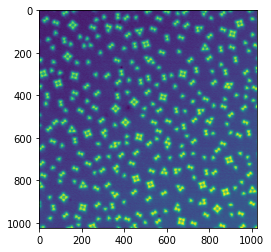

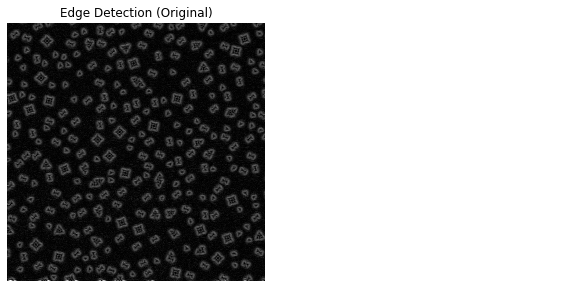

In [10]:
scan = nap.read.Scan("Stetsovych Helicene/Helicene_Ag(111)008.sxm")
im = scan.signals['Z']['forward']
if scan.header['scan_dir'] == 'down':
    im = np.flipud(im)
plt.imshow(im)

edge_sobel = filters.sobel(im)
fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True,
                         figsize=(8, 4))

axes[0].imshow(edge_sobel, cmap=plt.cm.gray)
axes[0].set_title('Edge Detection (Original)')
for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()

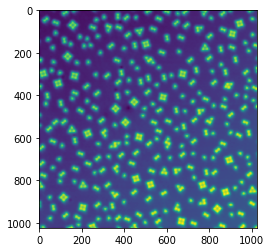

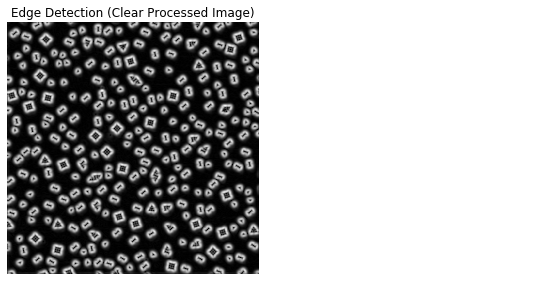

In [32]:
##########  Load the image file  ###########
scan = nap.read.Scan("Stetsovych Helicene/Helicene_Ag(111)008.sxm")
im = scan.signals['Z']['forward']
if scan.header['scan_dir'] == 'down':
    im = np.flipud(im)
    
f = im
blurred_f = ndimage.gaussian_filter(f, 3)
filter_blurred_f = ndimage.gaussian_filter(blurred_f, 1)
plt.imshow(filter_blurred_f)
############################################



#########  Apply edge detection filter  ########
edge_sobel_1 = filters.sobel(filter_blurred_f)
fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True,
                         figsize=(8, 4))

axes[0].imshow(edge_sobel_1, cmap=plt.cm.gray)
axes[0].set_title('Edge Detection (Clear Processed Image)')
for ax in axes:
    ax.axis('off')

plt.tight_layout()
###############################################
plt.show()

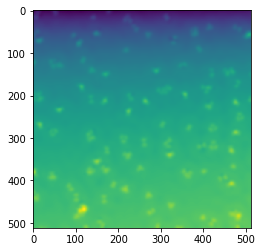

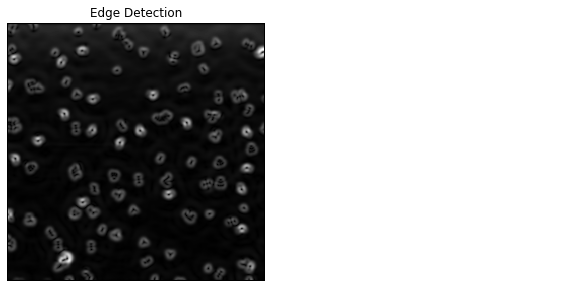

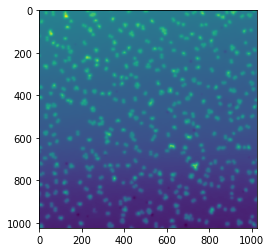

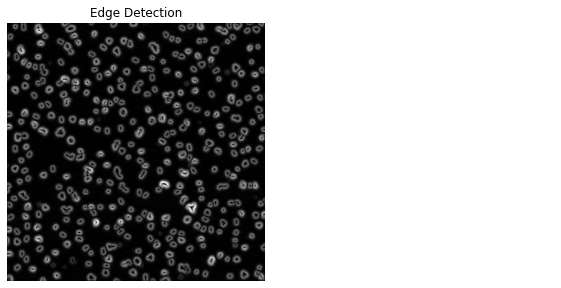

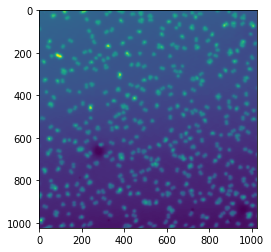

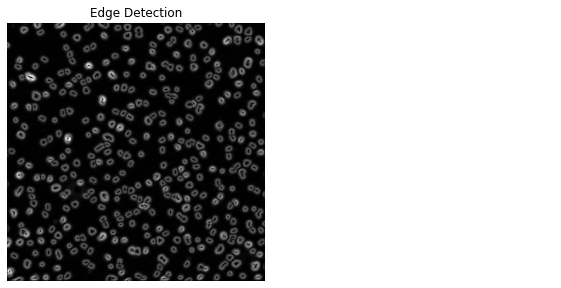

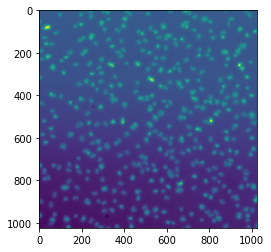

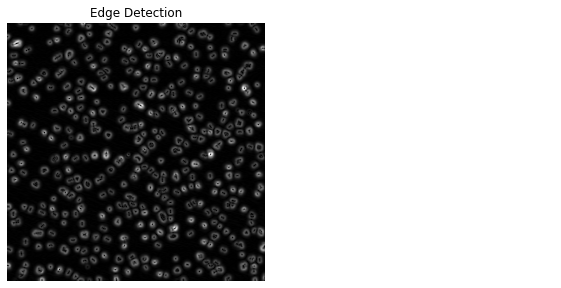

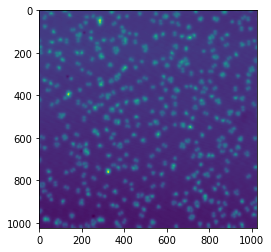

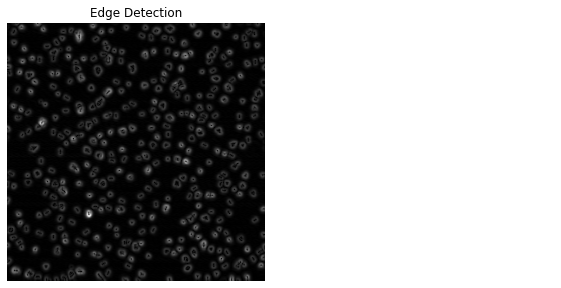

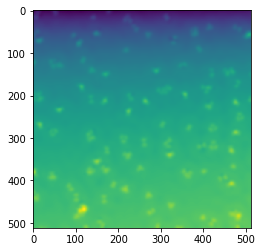

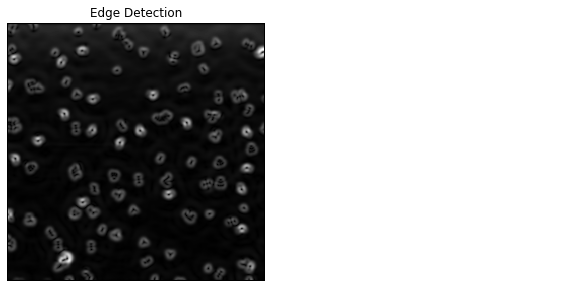

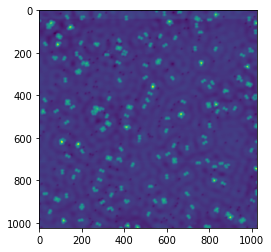

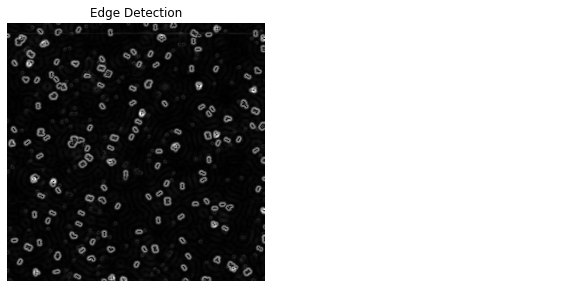

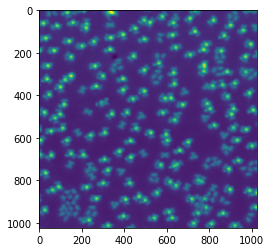

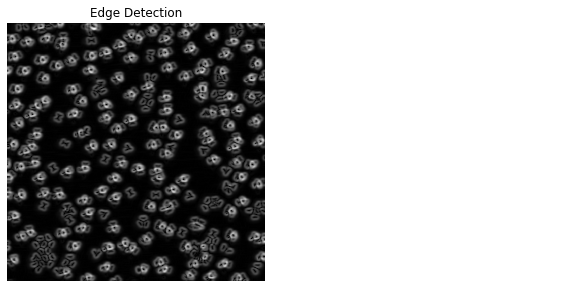

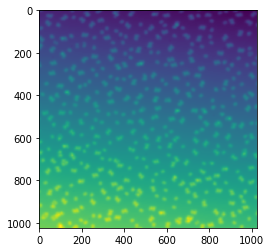

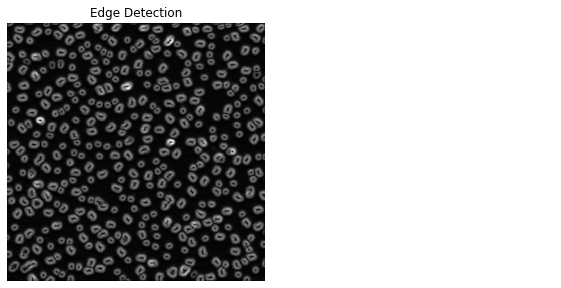

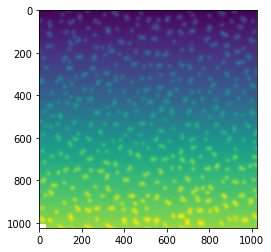

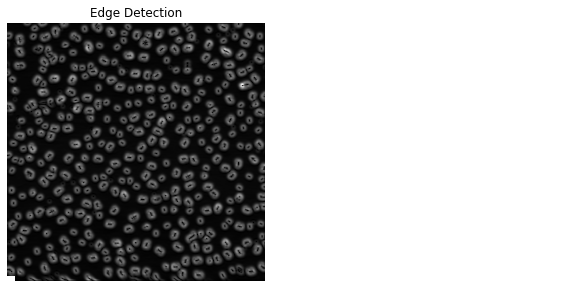

In [33]:
Hellerstedt_APT = ['Hellerstedt APT/111_test_data.p', "Hellerstedt APT/Ag111_APT_007.sxm", "Hellerstedt APT/Ag111_APT_008.sxm", "Hellerstedt APT/Ag111_APT_009.sxm", 
                   "Hellerstedt APT/Ag111_APT_010.sxm", "Hellerstedt APT/Ag111_APT_111.sxm", "Hellerstedt APT/Ag111_APT_CO_044.p", "Hellerstedt APT/Ag111_APT_LL1s_UV9min_009.sxm", 
                   "Hellerstedt APT/Ag111_APT_UV21min_anneal_003.sxm", "Hellerstedt APT/Ag111_APT_UV21min_anneal_40min_018.sxm"]

for file in Hellerstedt_APT:
    if file[-1] == "p":
        d = pickle.load(open(file, 'rb'))
        im = d['image']
        f = im
        blurred_f = ndimage.gaussian_filter(f, 3)
        filter_blurred_f = ndimage.gaussian_filter(blurred_f, 1)
        plt.imshow(filter_blurred_f)

        edge_sobel = filters.sobel(filter_blurred_f)

        fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True,
                         figsize=(8, 4))

        axes[0].imshow(edge_sobel, cmap=plt.cm.gray)
        axes[0].set_title('Edge Detection')

        for ax in axes:
            ax.axis('off')

        plt.tight_layout()
        plt.show()
    elif file[-1] == "m":
        scan = nap.read.Scan(file)

        im = scan.signals['Z']['forward']
        if scan.header['scan_dir'] == 'down':
            im = np.flipud(im)
        f = im
        blurred_f = ndimage.gaussian_filter(f, 3)
        filter_blurred_f = ndimage.gaussian_filter(blurred_f, 1)
        plt.imshow(filter_blurred_f)

        edge_sobel = filters.sobel(filter_blurred_f)

        fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True,
                         figsize=(8, 4))

        axes[0].imshow(edge_sobel, cmap=plt.cm.gray)
        axes[0].set_title('Edge Detection')

        for ax in axes:
            ax.axis('off')

        plt.tight_layout()
        plt.show()
        